<a href="https://colab.research.google.com/github/cinth90/Datascience1/blob/main/bajas_autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_bajas = pd.read_csv('https://raw.githubusercontent.com/cinth90/Datascience1/refs/heads/main/dnrpa-bajas-autos-202508.csv', sep=',')
df_bajas.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,AUTOMOTOR - BAJA C/RECUPERACION DE PIEZAS,2025-08-01,2012-10-19,2029,CAPITAL FEDERAL Nº 029,Ciudad Autónoma de Buenos Aires,Nacional,2012.0,17.0,SEDAN 5 PTAS,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1984,PARAGUAY,100.0,2,221.0
1,AUTOMOTOR - BAJA P/DEST/SIN/DESG/ENVEJ.,2025-08-01,2008-05-27,2038,CAPITAL FEDERAL Nº 038,Ciudad Autónoma de Buenos Aires,Protocolo 21,2008.0,5.0,SEDAN 5 PUERTAS,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1987,PARAGUAY,100.0,2,221.0
2,AUTOMOTOR - BAJA C/RECUPERACION DE PIEZAS,2025-08-01,2016-10-25,2048,CAPITAL FEDERAL Nº 048,Ciudad Autónoma de Buenos Aires,Nacional,2016.0,17.0,SEDAN 5 PUERTAS,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1992,ARGENTINA,100.0,2,200.0
3,AUTOMOTOR - BAJA C/RECUPERACION DE PIEZAS,2025-08-01,2010-02-16,2064,CAPITAL FEDERAL Nº 064,Ciudad Autónoma de Buenos Aires,Protocolo 21,2010.0,5.0,SEDAN 5 PTAS,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1957,ARGENTINA,50.0,2,200.0
4,AUTOMOTOR - BAJA C/RECUPERACION DE PIEZAS,2025-08-01,2012-01-27,2064,CAPITAL FEDERAL Nº 064,Ciudad Autónoma de Buenos Aires,Protocolo 21,2012.0,22.0,SEDAN 3 PTAS,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1990,ARGENTINA,100.0,2,200.0


Analisis de datos nulos

In [3]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

df_bajas.replace(0, np.nan, inplace=True)
(df_bajas.isna().mean()*100).round(2).sort_values(ascending=False) #muestra el porcentaje de valores faltantes para cada columna, ordenado de mayor a menor.

,0
titular_pais_nacimiento_id,13.36
automotor_uso_codigo,3.28
automotor_tipo_codigo,2.20
automotor_modelo_codigo,1.49
automotor_marca_codigo,0.98
automotor_anio_modelo,0.65
titular_domicilio_localidad,0.03
tramite_fecha,0.00
tramite_tipo,0.00
registro_seccional_provincia,0.00


In [4]:
df_bajas.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
registro_seccional_codigo,3690.0,6275.42,7279.98,1001.00,1180.0,2038.0,12001.0,24008.0
automotor_anio_modelo,3666.0,2003.51,118.74,20.00,2007.0,2012.0,2016.0,2025.0
automotor_tipo_codigo,3609.0,14.85,17.47,1.00,5.0,12.0,17.0,99.0
automotor_uso_codigo,3569.0,1.03,0.33,1.00,1.0,1.0,1.0,9.0
titular_porcentaje_titularidad,3690.0,97.15,11.75,16.68,100.0,100.0,100.0,100.0
titular_domicilio_provincia_id,3690.0,24.10,28.39,2.00,6.0,6.0,46.0,94.0
titular_pais_nacimiento_id,3197.0,200.87,8.24,200.00,200.0,200.0,200.0,417.0


Graficos para analizar la distribucion de los datos

In [5]:
def generar_distribuciones(df: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(16, 9))
    df.hist(bins=20, layout=(3, 3), color='skyblue', alpha=0.7, edgecolor='black')
    plt.suptitle('Distribuciones ', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

<Figure size 1600x900 with 0 Axes>

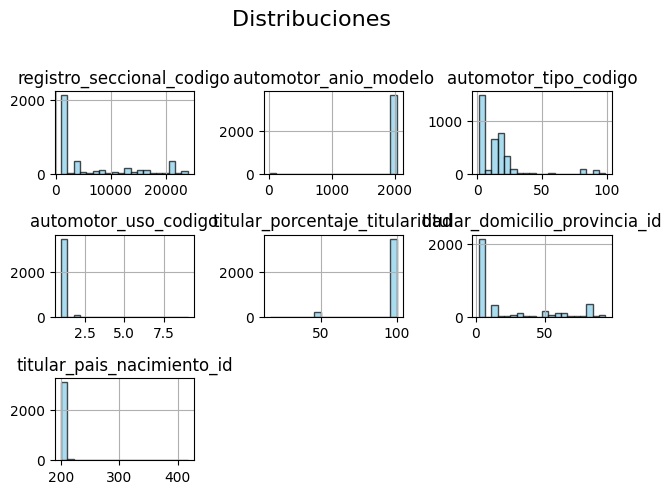

In [6]:
generar_distribuciones(df_bajas)

In [12]:
columna_titular_pais_nacimiento_id = ['titular_pais_nacimiento_id']# "no aplica" esta vacio, relleno con id 299
columna_simple_imputer = ['titular_domicilio_localidad','automotor_uso_codigo','automotor_tipo_codigo','automotor_marca_codigo', 'automotor_modelo_codigo'] #0.03% muy bajo % de nulos. Imputo por la moda
columna_automotor_anio_modelo= ['automotor_anio_modelo']#automotor_anio_modelo  0.65% valores nulos. imputo por la mediana
#columnas_knn_imputer = [] # moderados:automotor_uso_codigo con 3.28%, automotor_tipo_codigo con 2.20%, automotor_modelo_codigo con 1.49%, automotor_marca_codigo con 0.98%, automotor_anio_modelo con 0.65%)

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer # librería diseñada para rellenar datos faltantes.
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge #modelo de machine learning para prededir faltantes
# Crear una copia del dataframe para no modificar el original
df_imputed = df_bajas.copy()

In [8]:
# Se rellena pais: No aplica con 299
df_imputed[columna_titular_pais_nacimiento_id] = df_imputed[columna_titular_pais_nacimiento_id].fillna(299)

In [13]:
#Aplicando SimpleImputer con moda
imputer_simple = SimpleImputer(strategy='most_frequent') #rellenar nan con estrategia most_frequent-->moda
df_imputed[columna_simple_imputer] = imputer_simple.fit_transform(df_imputed[columna_simple_imputer])
#.fit(): El imputador aprende la moda de la columna especificada, ignorando los valores nulos.
#.transform(): El imputador aplica esa moda para reemplazar los valores nulos en la columna.

#Aplicando SimpleImputer con mediana
imputer_simple = SimpleImputer(strategy='median') #rellenar nan con estrategia median-->mediana
df_imputed[columna_automotor_anio_modelo] = imputer_simple.fit_transform(df_imputed[columna_automotor_anio_modelo])
#.fit(): El imputador aprende la mediana de la columna especificada, ignorando los valores nulos.
#.transform(): El imputador aplica esa mediana para reemplazar los valores nulos en la columna.

In [14]:
print("DataFrame con valores nulos imputados:")
print(df_imputed.isnull().sum())#verifica el exito al contar la cantidad de valores nulos que quedan en cada columna (que deberían ser cero).


DataFrame con valores nulos imputados:
tramite_tipo                      0
tramite_fecha                     0
fecha_inscripcion_inicial         0
registro_seccional_codigo         0
registro_seccional_descripcion    0
registro_seccional_provincia      0
automotor_origen                  0
automotor_anio_modelo             0
automotor_tipo_codigo             0
automotor_tipo_descripcion        0
automotor_marca_codigo            0
automotor_marca_descripcion       0
automotor_modelo_codigo           0
automotor_modelo_descripcion      0
automotor_uso_codigo              0
automotor_uso_descripcion         0
titular_tipo_persona              0
titular_domicilio_localidad       0
titular_domicilio_provincia       0
titular_genero                    0
titular_anio_nacimiento           0
titular_pais_nacimiento           0
titular_porcentaje_titularidad    0
titular_domicilio_provincia_id    0
titular_pais_nacimiento_id        0
dtype: int64


<Figure size 1600x900 with 0 Axes>

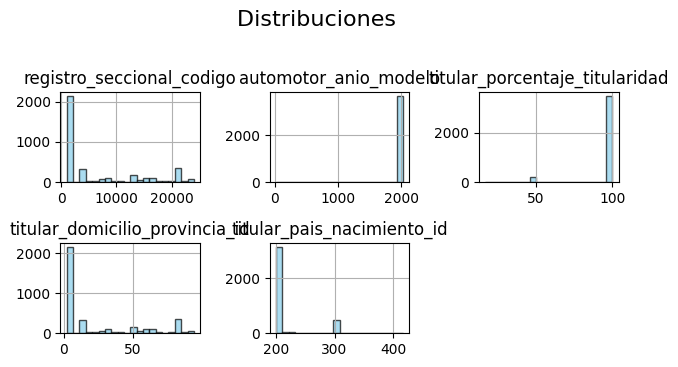

In [15]:
generar_distribuciones(df_imputed)

Graficos

In [21]:
# Resampleo anual - conteo de bajas por anio de fabricacion
df_bajas['fecha_inscripcion_inicial'] = pd.to_datetime(df_bajas['fecha_inscripcion_inicial'])
# Cree una copia para no modificar el df_bajas original
df_bajas_con_indice = df_bajas.set_index('fecha_inscripcion_inicial')
# Re-muestrear por año (fin de año calendario hábil 'BA') y contar el número de registros
df_conteo_bajas_por_anio = df_bajas_con_indice.resample('BA').size()

print("\nBajas por año de inscripción inicial (conteo):")
print(df_conteo_bajas_por_anio)



Bajas por año de inscripción inicial (conteo):
fecha_inscripcion_inicial
1966-12-30      1
1967-12-29      1
1968-12-31      4
1969-12-31      1
1970-12-31      7
1971-12-31     12
1972-12-29      5
1973-12-31     11
1974-12-31      8
1975-12-31      9
1976-12-31      6
1977-12-30      8
1978-12-29      4
1979-12-31      4
1980-12-31     16
1981-12-31      6
1982-12-31      7
1983-12-30     10
1984-12-31      8
1985-12-31     11
1986-12-31      9
1987-12-31      7
1988-12-30      6
1989-12-29     10
1990-12-31      7
1991-12-31      3
1992-12-31     21
1993-12-31     18
1994-12-30     31
1995-12-29     27
1996-12-31     38
1997-12-31     33
1998-12-31     43
1999-12-31     59
2000-12-29     55
2001-12-31     25
2002-12-31     19
2003-12-31     25
2004-12-31     51
2005-12-30     94
2006-12-29     92
2007-12-31    149
2008-12-31    166
2009-12-31    127
2010-12-31    191
2011-12-30    236
2012-12-31    256
2013-12-31    278
2014-12-31    190
2015-12-31    189
2016-12-30    185
2017-12-

/tmp/ipython-input-2342262541.py:6: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_conteo_bajas_por_anio = df_bajas_con_indice.resample('BA').size()


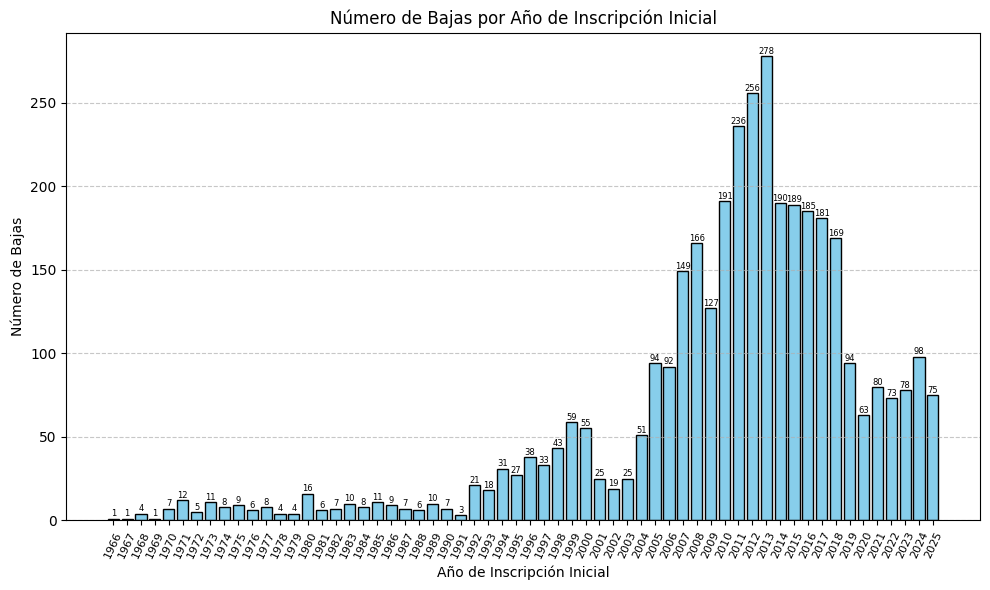

In [28]:
#Grafico de barras con marplotlib
#Graficando: Número de Bajas por Año de Inscripción Inicial
import matplotlib.pyplot as plt

# Los años como índice del eje X y el conteo de las bajas indice eje Y
años = df_conteo_bajas_por_anio.index.year
conteo = df_conteo_bajas_por_anio.values

plt.figure(figsize=(10, 6)) # Tamaño del gráfico

# Gráfico de barras
plt.bar(años, conteo, color='skyblue', edgecolor='black')

# Personalizacion del gráfico
plt.title('Número de Bajas por Año de Inscripción Inicial')
plt.xlabel('Año de Inscripción Inicial')
plt.ylabel('Número de Bajas')
plt.xticks(años, rotation=65, fontsize=8) #etiqueta de años en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula solo en el eje Y
# Añadir etiquetas de valor encima de cada barra
for i, v in enumerate(conteo):
    plt.text(años[i], v + 0.1, str(v), color='black', ha='center', va='bottom', fontsize=6)

plt.tight_layout()
plt.show()


In [33]:
df_bajas.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id,anio_inscripcion
0,AUTOMOTOR - BAJA C/RECUPERACION DE PIEZAS,2025-08-01,2012-10-19,2029,CAPITAL FEDERAL Nº 029,Ciudad Autónoma de Buenos Aires,Nacional,2012.0,17.0,SEDAN 5 PTAS,...,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1984,PARAGUAY,100.0,2,221.0,2012
1,AUTOMOTOR - BAJA P/DEST/SIN/DESG/ENVEJ.,2025-08-01,2008-05-27,2038,CAPITAL FEDERAL Nº 038,Ciudad Autónoma de Buenos Aires,Protocolo 21,2008.0,5.0,SEDAN 5 PUERTAS,...,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1987,PARAGUAY,100.0,2,221.0,2008
2,AUTOMOTOR - BAJA C/RECUPERACION DE PIEZAS,2025-08-01,2016-10-25,2048,CAPITAL FEDERAL Nº 048,Ciudad Autónoma de Buenos Aires,Nacional,2016.0,17.0,SEDAN 5 PUERTAS,...,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1992,ARGENTINA,100.0,2,200.0,2016
3,AUTOMOTOR - BAJA C/RECUPERACION DE PIEZAS,2025-08-01,2010-02-16,2064,CAPITAL FEDERAL Nº 064,Ciudad Autónoma de Buenos Aires,Protocolo 21,2010.0,5.0,SEDAN 5 PTAS,...,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1957,ARGENTINA,50.0,2,200.0,2010
4,AUTOMOTOR - BAJA C/RECUPERACION DE PIEZAS,2025-08-01,2012-01-27,2064,CAPITAL FEDERAL Nº 064,Ciudad Autónoma de Buenos Aires,Protocolo 21,2012.0,22.0,SEDAN 3 PTAS,...,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1990,ARGENTINA,100.0,2,200.0,2012


In [34]:
# Contar bajas por provincia Y por año de inscripción
df_bajas['fecha_inscripcion_inicial'] = df_bajas['fecha_inscripcion_inicial'].dt.year

df_conteo_por_provincia_y_anio = df_bajas.groupby(['registro_seccional_provincia', 'fecha_inscripcion_inicial']).size().unstack(fill_value=0)
#.unstack(fill_value=0): Reorganiza los resultados para que las provincias sean las filas, los años las columnas y los valores sean los conteos, rellenando con 0 donde no hay datos.

print("\nBajas por provincia y año de inscripción (conteo):")
print(df_conteo_por_provincia_y_anio)


Bajas por provincia y año de inscripción (conteo):
fecha_inscripcion_inicial        1966  1967  1968  1969  1970  1971  1972  \
registro_seccional_provincia                                                
Buenos Aires                        1     1     0     0     1     3     1   
Catamarca                           0     0     0     0     0     0     0   
Chaco                               0     0     0     0     0     0     0   
Chubut                              0     0     0     0     0     0     0   
Ciudad Autónoma de Buenos Aires     0     0     1     0     2     1     1   
Corrientes                          0     0     0     0     0     0     0   
Córdoba                             0     0     0     0     2     2     0   
Entre Ríos                          0     0     1     0     0     1     0   
Formosa                             0     0     0     0     0     0     0   
Jujuy                               0     0     0     0     1     0     0   
La Pampa                


Bajas por provincia y año de inscripción (conteo):
fecha_inscripcion_inicial        1970
registro_seccional_provincia         
Buenos Aires                     1705
Catamarca                          11
Chaco                              20
Chubut                             65
Ciudad Autónoma de Buenos Aires   435
Corrientes                         33
Córdoba                           333
Entre Ríos                         86
Formosa                            15
Jujuy                              27
La Pampa                           36
La Rioja                            9
Mendoza                           165
Misiones                           50
Neuquén                            97
Río Negro                          85
Salta                              16
San Juan                           22
San Luis                           16
Santa Cruz                         30
Santa Fe                          347
Santiago del Estero                22
Tierra del Fuego                   3

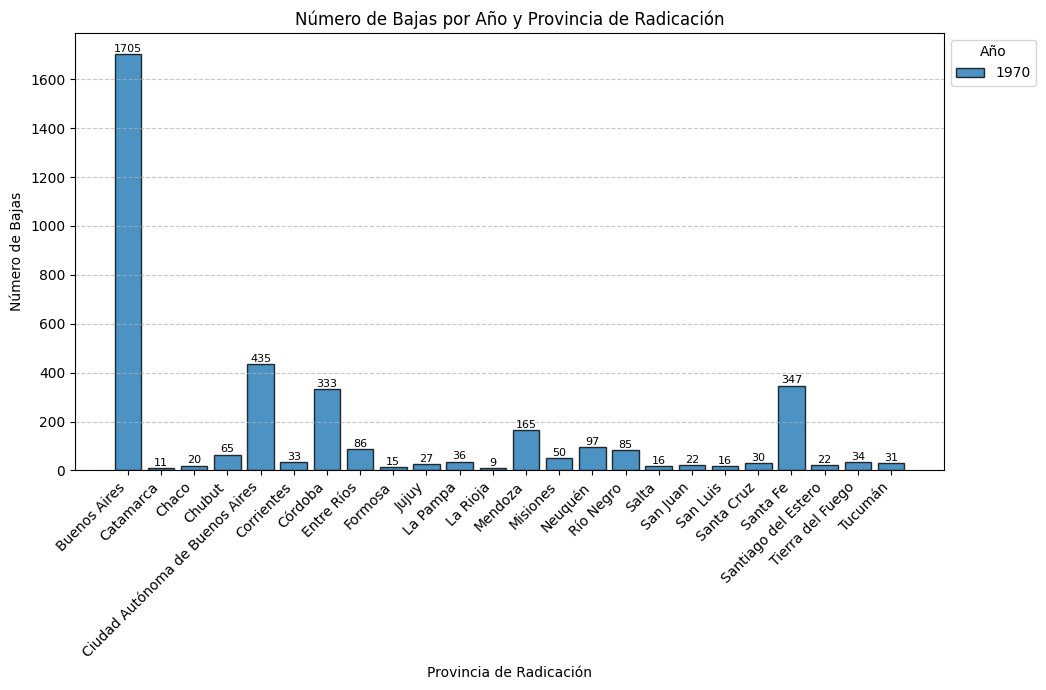

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- PREPROCESAMIENTO ---
df_bajas['fecha_inscripcion_inicial'] = pd.to_datetime(df_bajas['fecha_inscripcion_inicial'], errors='coerce')
df_bajas['fecha_inscripcion_inicial'] = df_bajas['fecha_inscripcion_inicial'].dt.year

# Agrupar y contar
df_conteo_por_provincia_y_anio = (
    df_bajas.groupby(['registro_seccional_provincia', 'fecha_inscripcion_inicial'])
    .size()
    .unstack(fill_value=0)
)

print("\nBajas por provincia y año de inscripción (conteo):")
print(df_conteo_por_provincia_y_anio)

# --- GRÁFICO DE BARRAS AGRUPADAS ---
provincias = df_conteo_por_provincia_y_anio.index
años = df_conteo_por_provincia_y_anio.columns
num_provincias = len(provincias)
num_años = len(años)

bar_width = 0.8 / num_años
index = np.arange(num_provincias)

plt.figure(figsize=(12, 7))

for i, año in enumerate(años):
    valores = df_conteo_por_provincia_y_anio[año]
    posiciones = index + i * bar_width - (num_años / 2 - 0.5) * bar_width

    barras = plt.bar(
        posiciones,
        valores,
        bar_width,
        label=str(año),
        edgecolor='black',
        alpha=0.8
    )

    # --- Agregar etiquetas encima de cada barra ---
    for x, y in zip(posiciones, valores):
        plt.text(x, y + 0.5, str(y), ha='center', va='bottom', fontsize=8, rotation=0)

# Personalización
plt.title('Número de Bajas por Año y Provincia de Radicación')
plt.xlabel('Provincia de Radicación')
plt.ylabel('Número de Bajas')
plt.xticks(index, provincias, rotation=45, ha='right')
plt.legend(title='Año', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()
